**Anant Jain**

# Importing Libraries & Dataset

In [42]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
ins_df = pd.read_csv('https://raw.githubusercontent.com/ammishra08/MachineLearning/master/Datasets/insurance.csv')

In [44]:
ins_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# Data Pre-processing

In [45]:
ins_df.shape

(1338, 7)

In [46]:
ins_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [47]:
ins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [48]:
ins_df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [49]:
from sklearn.preprocessing import LabelEncoder

In [50]:
le = LabelEncoder()

In [51]:
le.fit(ins_df['region'].drop_duplicates())

LabelEncoder()

In [52]:
ins_df['region'] = le.transform(ins_df['region'])

In [53]:
le.fit(ins_df['sex'].drop_duplicates())

LabelEncoder()

In [54]:
ins_df['sex'] = le.transform(ins_df['sex'])

In [55]:
le.fit(ins_df['smoker'].drop_duplicates())

LabelEncoder()

In [56]:
ins_df['smoker'] = le.transform(ins_df['smoker'])

In [57]:
ins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [58]:
ins_df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


# Data Visulaization

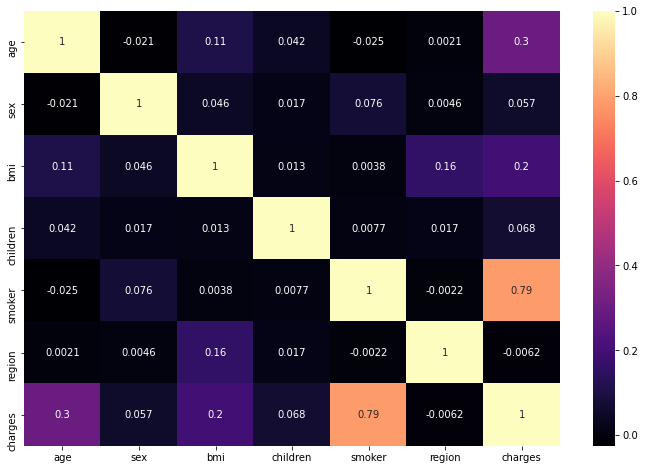

In [59]:
plt.figure(figsize = (12,8))
sns.heatmap(ins_df.corr(), annot = True, cmap = 'magma')

# Splitting Data

In [60]:
X = ins_df.drop(['sex', 'children', 'region', 'charges'], axis = 1)

In [61]:
Y = ins_df['charges']

In [62]:
X

,age,bmi,smoker
0,19,27.900,1
1,18,33.770,0
2,28,33.000,0
3,33,22.705,0
4,32,28.880,0
...,...,...,...
1333,50,30.970,0
1334,18,31.920,0
1335,18,36.850,0
1336,21,25.800,0


In [63]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

scaler.fit(X)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [64]:
scaler_X = scaler.transform(X)

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(scaler_X, Y, test_size = 0.2, random_state = 9 )

# Building Model

In [66]:
#Dense Layer in NN
from keras.layers import Dense
#Feed Forward NN
from keras.models import Sequential
#Model Optimizers
from keras.optimizers import RMSprop

In [67]:
def build_model ():
  model = Sequential()
  # Input Layer : num of neurons = (2)^n
  model.add(Dense(units = 64, activation='relu', input_shape = [len(X.keys())]))
  # Hidden Layer - I
  model.add(Dense(units = 128, activation='relu'))
  # Hidden Layer - II
  model.add(Dense(units = 128, activation='relu'))
  # Output Layer
  model.add(Dense(units = 1))

  # Optimizers = RMSProp
  # Alpha = Learning Rate : sample size = small (0.0001), sample size = large (0.01)
  optimizers = RMSprop(learning_rate= 0.0001)

  # For Regression : loss function - mean_squared_error
  model.compile(loss = 'mean_squared_error', optimizer = optimizers, metrics = ['mean_squared_error', 
                                                                                'mean_absolute_error'])
  return model 

In [68]:
model = build_model()

In [69]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                256       
_________________________________________________________________
dense_5 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_6 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 129       
Total params: 25,217
Trainable params: 25,217
Non-trainable params: 0
_________________________________________________________________


# Training Model

In [70]:
history = model.fit(X_train, Y_train, epochs = 1000, batch_size = 10, validation_split = 0.15)

Epoch 1/1000
91/91 [==============================] - 0s 2ms/step - loss: 322124288.0000 - mean_squared_error: 322124288.0000 - mean_absolute_error: 13234.7637 - val_loss: 340949728.0000 - val_mean_squared_error: 340949696.0000 - val_mean_absolute_error: 13728.4971
Epoch 2/1000
91/91 [==============================] - 0s 903us/step - loss: 322092448.0000 - mean_squared_error: 322092448.0000 - mean_absolute_error: 13233.7510 - val_loss: 340908000.0000 - val_mean_squared_error: 340908000.0000 - val_mean_absolute_error: 13727.1797
Epoch 3/1000
91/91 [==============================] - 0s 869us/step - loss: 322037312.0000 - mean_squared_error: 322037344.0000 - mean_absolute_error: 13231.9775 - val_loss: 340835584.0000 - val_mean_squared_error: 340835584.0000 - val_mean_absolute_error: 13724.8926
Epoch 4/1000
91/91 [==============================] - 0s 932us/step - loss: 321948064.0000 - mean_squared_error: 321948064.0000 - mean_absolute_error: 13229.0283 - val_loss: 340719104.0000 - val_mea

In [71]:
pd.DataFrame(history.history)

,loss,mean_squared_error,mean_absolute_error,val_loss,val_mean_squared_error,val_mean_absolute_error
0,322124288.0,322124288.0,13234.763672,340949728.0,340949696.0,13728.497070
1,322092448.0,322092448.0,13233.750977,340908000.0,340908000.0,13727.179688
2,322037312.0,322037344.0,13231.977539,340835584.0,340835584.0,13724.892578
3,321948064.0,321948064.0,13229.028320,340719104.0,340719104.0,13721.215820
4,321803680.0,321803680.0,13224.406250,340543200.0,340543200.0,13715.634766
...,...,...,...,...,...,...
995,22534624.0,22534624.0,2785.875732,39210440.0,39210440.0,3829.669678
996,22523276.0,22523276.0,2771.279785,39154452.0,39154452.0,3835.158447
997,22530594.0,22530594.0,2772.054443,39167388.0,39167388.0,3831.140137
998,22506558.0,22506558.0,2791.757080,39217556.0,39217552.0,3820.033447


# Plotting Model

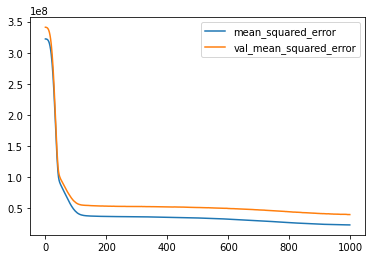

In [72]:
pd.DataFrame(history.history)[['mean_squared_error','val_mean_squared_error']].plot()

# Prediction Using Model

In [73]:
prediction = model.predict(X_test)

In [74]:
from sklearn.metrics import r2_score
r2_score(Y_test, prediction) 

0.8538989543816615

In [75]:
X_new = [[19, 27.900, 1]]

In [76]:
scaler_X_New = scaler.transform(X_new)

In [77]:
model.predict(scaler_X_New)

array([[23065.355]], dtype=float32)